In [1]:
import numpy as np
import matplotlib.pyplot as plt

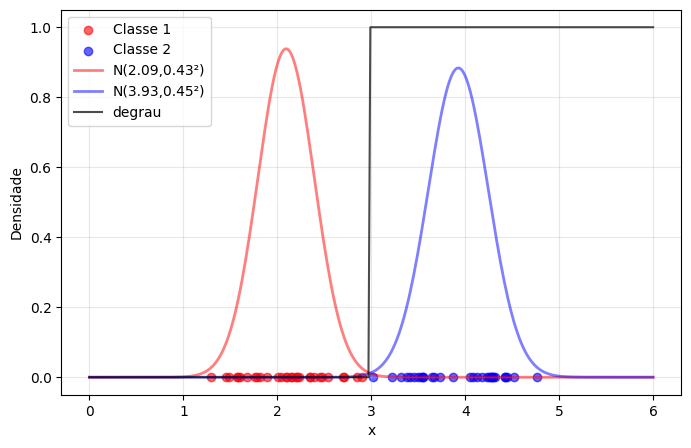

In [38]:
import numpy as np
import matplotlib.pyplot as plt

n1 = 30
xc1 = np.random.normal(loc=2, scale=0.5, size=n1)
n2 = 30
xc2 = np.random.normal(loc=4, scale=0.5, size=n2)

nn1 = len(xc1)
nn2 = len(xc1)
y1 = np.zeros(nn1)
y2 = np.zeros(nn2)

plt.figure(figsize=(8,5))
plt.scatter(xc1, y1, color='red', alpha=0.6, label='Classe 1')
plt.scatter(xc2, y2, color='blue',  alpha=0.6, label='Classe 2')

mu1, sigma1 = xc1.mean(), xc1.std()
mu2, sigma2 = xc2.mean(), xc2.std()

xrange = np.linspace(0, 6, 300)

def fnormal1var(mu, sigma, x):
    return (1/(np.sqrt(2*np.pi)*sigma)) * np.exp(-((x-mu)/sigma)**2)

fn1 = fnormal1var(mu1, sigma1, xrange)
fn2 = fnormal1var(mu2, sigma2, xrange)

plt.plot(xrange, fn1, color='red',alpha= 0.5, linewidth=2, label=f'N({mu1:.2f},{sigma1:.2f}²)')
plt.plot(xrange, fn2, color='blue',alpha= 0.5,  linewidth=2, label=f'N({mu2:.2f},{sigma2:.2f}²)')

plt.xlabel('x')
plt.ylabel('Densidade')

plt.grid(alpha=0.3)

nall = nn1 + nn2
pc1 = nn1/nall
pc2 = nn2/nall

pc1x = fn1*pc1/(pc2*fn2 + pc1*fn1)
pc2x = fn2*pc2/(pc2*fn2 + pc1*fn1)

y_hat = [1 if (pc1x-pc2x)[i] < 0 else 0 for i in range(len((pc1x-pc2x)))]
plt.plot(xrange,y_hat,color = 'black', alpha = 0.7,label = 'degrau')
plt.legend()
plt.show()



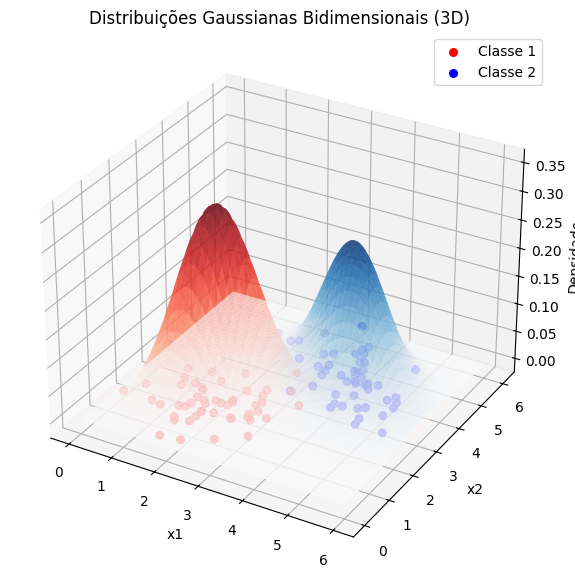

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


n1 = 50
n2 = 50

mu1 = np.array([2, 2])
Sigma1 = np.array([[0.5, 0.2],
                   [0.2, 0.5]])

mu2 = np.array([4, 4])
Sigma2 = np.array([[0.7, -0.3],
                   [-0.3, 0.7]])

xc1 = np.random.multivariate_normal(mu1, Sigma1, n1)
xc2 = np.random.multivariate_normal(mu2, Sigma2, n2)

x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

rv1 = multivariate_normal(mean=mu1, cov=Sigma1)
rv2 = multivariate_normal(mean=mu2, cov=Sigma2)

f1 = rv1.pdf(pos)
f2 = rv2.pdf(pos)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, f1, cmap='Reds', alpha=0.6, linewidth=0)
ax.plot_surface(X, Y, f2, cmap='Blues', alpha=0.6, linewidth=0)

ax.scatter(xc1[:,0], xc1[:,1], np.zeros(n1), c='red', s=30, label="Classe 1")
ax.scatter(xc2[:,0], xc2[:,1], np.zeros(n2), c='blue', s=30, label="Classe 2")

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Densidade")
ax.set_title("Distribuições Gaussianas Bidimensionais (3D)")

plt.legend()
plt.show()
